In [5]:
apikey = 'CpmpseRaYnDlQ2XQiuZGraA9xvyjCTZYgLvCmjDPurVb3hJX5rrklBmYXWtH1i6a'
secret = 'iiSpexaMrrAL6rsDGpQGZwrNP3Wr07zEs0BWvxLNohlAMsac2WQtBSxLYOxkR8jH'

In [4]:
!pip install python-binance mplfinance

You should consider upgrading via the 'C:\Users\davalvar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd 

In [6]:
client = Client(apikey, secret)


In [8]:
tickers = client.get_all_tickers()
tickers

[{'symbol': 'ETHBTC', 'price': '0.05710400'},
 {'symbol': 'LTCBTC', 'price': '0.00255400'},
 {'symbol': 'BNBBTC', 'price': '0.01154600'},
 {'symbol': 'NEOBTC', 'price': '0.00042200'},
 {'symbol': 'QTUMETH', 'price': '0.00249000'},
 {'symbol': 'EOSETH', 'price': '0.00084800'},
 {'symbol': 'SNTETH', 'price': '0.00002746'},
 {'symbol': 'BNTETH', 'price': '0.00043600'},
 {'symbol': 'BCCBTC', 'price': '0.07908100'},
 {'symbol': 'GASBTC', 'price': '0.00013240'},
 {'symbol': 'BNBETH', 'price': '0.20220000'},
 {'symbol': 'BTCUSDT', 'price': '20107.13000000'},
 {'symbol': 'ETHUSDT', 'price': '1148.00000000'},
 {'symbol': 'HSRBTC', 'price': '0.00041400'},
 {'symbol': 'OAXETH', 'price': '0.00017780'},
 {'symbol': 'DNTETH', 'price': '0.00002801'},
 {'symbol': 'MCOETH', 'price': '0.00577200'},
 {'symbol': 'ICNETH', 'price': '0.00166300'},
 {'symbol': 'MCOBTC', 'price': '0.00021140'},
 {'symbol': 'WTCBTC', 'price': '0.00000892'},
 {'symbol': 'WTCETH', 'price': '0.00023700'},
 {'symbol': 'LRCBTC', 'p

In [9]:
tickers[11]

{'symbol': 'BTCUSDT', 'price': '20107.13000000'}

# Working with Data Frame 


In [10]:
tickers_df = pd.DataFrame(tickers)

In [11]:
tickers_df


,symbol,price
0,ETHBTC,0.05710400
1,LTCBTC,0.00255400
2,BNBBTC,0.01154600
3,NEOBTC,0.00042200
4,QTUMETH,0.00249000
...,...,...
2068,GTOBUSD,0.01927000
2069,SNXETH,0.00233100
2070,WBTCBUSD,20059.87000000
2071,BELETH,0.00074490


### Change Index

In [12]:
tickers_df.reset_index(inplace = True)
tickers_df.set_index('symbol', inplace = True)


In [13]:
tickers_df.loc['BTCUSDT']

index                11
price    20107.13000000
Name: BTCUSDT, dtype: object

In [14]:
tickers_df.loc['BTCUSDT']['price'] 

'20107.13000000'

# Depth 

In [15]:
depth = client.get_order_book(symbol = 'BTCUSDT')

In [16]:
depth 

{'lastUpdateId': 20737556484,
 'bids': [['20107.48000000', '1.09307000'],
  ['20107.33000000', '0.17078000'],
  ['20106.88000000', '0.02586000'],
  ['20106.54000000', '0.04978000'],
  ['20105.59000000', '0.14761000'],
  ['20105.58000000', '0.21542000'],
  ['20105.54000000', '0.05095000'],
  ['20104.48000000', '0.01250000'],
  ['20104.28000000', '0.43880000'],
  ['20101.85000000', '0.01102000'],
  ['20101.38000000', '0.69544000'],
  ['20101.19000000', '0.50000000'],
  ['20100.90000000', '0.96435000'],
  ['20100.52000000', '1.00655000'],
  ['20100.13000000', '0.07576000'],
  ['20099.41000000', '0.24863000'],
  ['20099.01000000', '0.54820000'],
  ['20098.55000000', '0.00273000'],
  ['20098.45000000', '0.01250000'],
  ['20097.77000000', '0.05092000'],
  ['20097.40000000', '0.24864000'],
  ['20097.29000000', '5.45044000'],
  ['20097.28000000', '0.24752000'],
  ['20097.04000000', '0.24900000'],
  ['20097.00000000', '0.79600000'],
  ['20096.96000000', '0.55000000'],
  ['20096.89000000', '2.71

In [17]:
depth_df =pd.DataFrame(depth['bids'])
depth_df.columns = ['Price', 'Volume']
depth_df.head()

,Price,Volume
0,20107.48000000,1.09307000
1,20107.33000000,0.17078000
2,20106.88000000,0.02586000
3,20106.54000000,0.04978000
4,20105.59000000,0.14761000


In [31]:
historical = client.get_historical_klines('BTCUSDT', Client.KLINE_INTERVAL_1DAY, '1 Jan 2022')
hist_df = pd.DataFrame(historical) 
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1640995200000,46216.93000000,47954.63000000,46208.37000000,47722.65000000,19604.46325000,1641081599999,924155159.58348650,714899,9942.36679000,468738711.79010650,0
1,1641081600000,47722.66000000,47990.00000000,46654.00000000,47286.18000000,18340.46040000,1641167999999,866610995.56335820,709624,9166.46954000,433182392.28194660,0
2,1641168000000,47286.18000000,47570.00000000,45696.00000000,46446.10000000,27662.07710000,1641254399999,1292203508.32565490,885624,13524.76045000,631879430.11428000,0
3,1641254400000,46446.10000000,47557.54000000,45500.00000000,45832.01000000,35491.41360000,1641340799999,1649170424.12761340,1021815,17689.26808000,821725463.08080750,0
4,1641340800000,45832.01000000,47070.00000000,42500.00000000,43451.13000000,51784.11857000,1641427199999,2334288544.64544840,1478532,23552.99460000,1063287226.35714140,0


In [32]:
hist_df.columns = ['Open Time', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close Time', 'Quote Asset Volume', 
                    'Number of Trades', 'TB Base Volume', 'TB Quote Volume', 'Ignore']
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1640995200000,46216.93000000,47954.63000000,46208.37000000,47722.65000000,19604.46325000,1641081599999,924155159.58348650,714899,9942.36679000,468738711.79010650,0
1,1641081600000,47722.66000000,47990.00000000,46654.00000000,47286.18000000,18340.46040000,1641167999999,866610995.56335820,709624,9166.46954000,433182392.28194660,0
2,1641168000000,47286.18000000,47570.00000000,45696.00000000,46446.10000000,27662.07710000,1641254399999,1292203508.32565490,885624,13524.76045000,631879430.11428000,0
3,1641254400000,46446.10000000,47557.54000000,45500.00000000,45832.01000000,35491.41360000,1641340799999,1649170424.12761340,1021815,17689.26808000,821725463.08080750,0
4,1641340800000,45832.01000000,47070.00000000,42500.00000000,43451.13000000,51784.11857000,1641427199999,2334288544.64544840,1478532,23552.99460000,1063287226.35714140,0


In [25]:
hist_df.dtypes

Open Time              int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [27]:
hist_df.describe()


,Open Time,Close Time,Number of Trades
count,1.860000e+02,1.860000e+02,1.860000e+02
mean,1.648987e+12,1.649074e+12,1.227149e+06
std,4.651579e+09,4.651579e+09,5.238815e+05
min,1.640995e+12,1.641082e+12,3.393290e+05
25%,1.644991e+12,1.645078e+12,9.177200e+05
50%,1.648987e+12,1.649074e+12,1.104638e+06
75%,1.652983e+12,1.653070e+12,1.384848e+06
max,1.656979e+12,1.657066e+12,3.951233e+06


In [34]:
hist_df['Open Time'] = pd.to_datetime(hist_df['Open Time']/1000, unit='s')
hist_df['Close Time'] = pd.to_datetime(hist_df['Close Time']/1000, unit='s')

In [49]:
hist_df.head()

,Open Time,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,2022-01-01,46216.93,47954.63,46208.37,47722.65,19604.46325,2022-01-01 23:59:59.999000064,9.241552e+08,714899,9942.36679,4.687387e+08,0
1,2022-01-02,47722.66,47990.00,46654.00,47286.18,18340.46040,2022-01-02 23:59:59.999000064,8.666110e+08,709624,9166.46954,4.331824e+08,0
2,2022-01-03,47286.18,47570.00,45696.00,46446.10,27662.07710,2022-01-03 23:59:59.999000064,1.292204e+09,885624,13524.76045,6.318794e+08,0
3,2022-01-04,46446.10,47557.54,45500.00,45832.01,35491.41360,2022-01-04 23:59:59.999000064,1.649170e+09,1021815,17689.26808,8.217255e+08,0
4,2022-01-05,45832.01,47070.00,42500.00,43451.13,51784.11857,2022-01-05 23:59:59.999000064,2.334289e+09,1478532,23552.99460,1.063287e+09,0


In [35]:

import mplfinance as mpf
mpf.plot(hist_df.set_index('Close Time').tail(100))

ValueError: Data for column "Open" must be ALL float or int.

In [42]:
numericas = ['Open', 'High', 'Low', 'Close', 'Volume', 'Quote Asset Volume', 'TB Base Volume', 'TB Quote Volume']
hist_df[numericas] = hist_df[numericas].apply(pd.to_numeric, axis = 1)

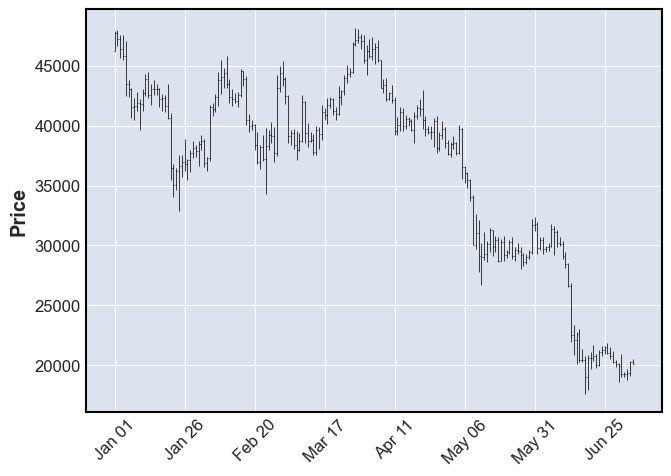

In [44]:
mpf.plot(hist_df.set_index('Close Time'))

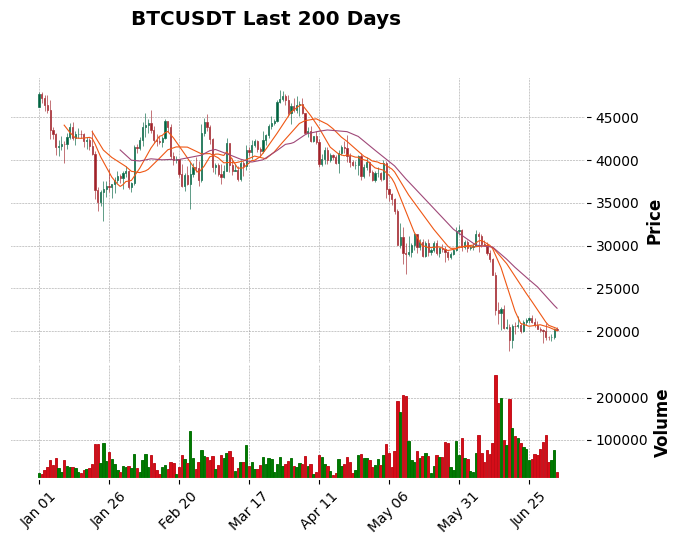

In [50]:
mpf.plot(hist_df.set_index('Close Time'), 
        type='candle', style='charles', 
        volume=True, 
        title='BTCUSDT Last 200 Days', 
        mav=(10,20,30))

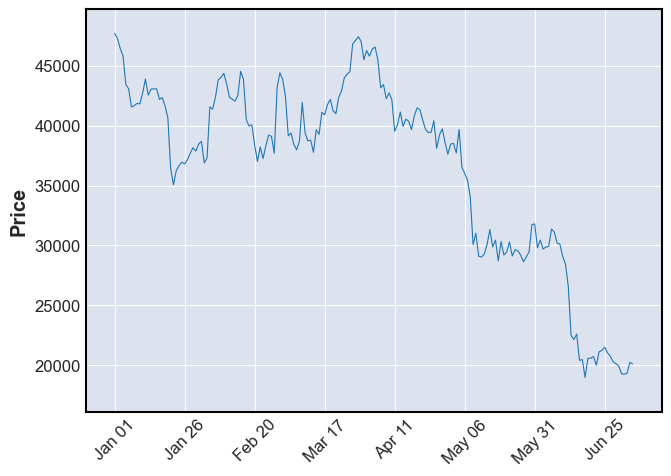

In [54]:
 mpf.plot(hist_df.set_index('Close Time'), type= 'line')

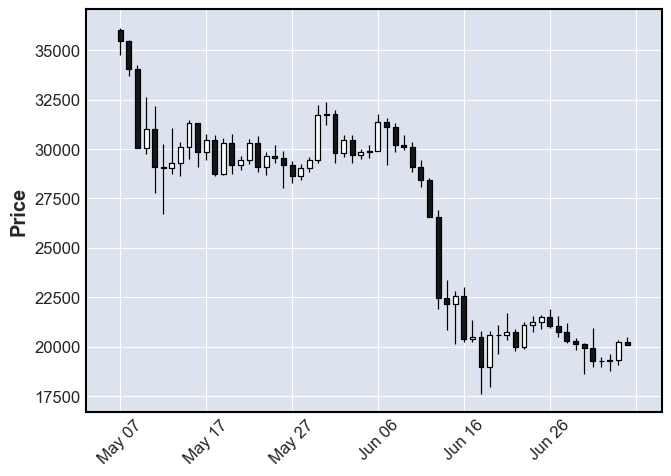

In [58]:
# last 60 days
mpf.plot(hist_df.set_index('Close Time').tail(60), type='candle')